In [35]:
%pip install yfinance seaborn scikit_learn

  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 10.9 MB/s eta 0:00:0000:010:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

In [11]:
ticker_list = ["AAPL"]
df = yf.download(ticker_list, start="2020-01-01", end="2023-12-31", interval="1mo")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,74.059998,81.962502,73.187500,77.377502,75.287575,2934370400
2020-02-01,76.074997,81.805000,64.092499,68.339996,66.494156,3019279200
2020-03-01,70.570000,76.000000,53.152500,63.572498,62.002239,6280072400
2020-04-01,61.625000,73.632500,59.224998,73.449997,71.635773,3265299200
2020-05-01,71.562500,81.059998,71.462502,79.485001,77.521690,2805936000


In [14]:
df["simple_moving_avg_15"] = df[["Close"]].rolling(15).mean().shift(1)
df["simple_moving_avg_60"] = df[["Close"]].rolling(60).mean().shift(1)
df["simple_moving_avg_3"] = df[["Close"]].rolling(3).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_moving_avg_15,simple_moving_avg_60,simple_moving_avg_3
Date,,,,,,,,,
2020-01-01,74.059998,81.962502,73.187500,77.377502,75.287575,2934370400,NaN,NaN,NaN
2020-02-01,76.074997,81.805000,64.092499,68.339996,66.494156,3019279200,NaN,NaN,NaN
2020-03-01,70.570000,76.000000,53.152500,63.572498,62.002239,6280072400,NaN,NaN,69.763332
2020-04-01,61.625000,73.632500,59.224998,73.449997,71.635773,3265299200,NaN,NaN,68.454164
2020-05-01,71.562500,81.059998,71.462502,79.485001,77.521690,2805936000,NaN,NaN,72.169165


<Axes: xlabel='Date'>

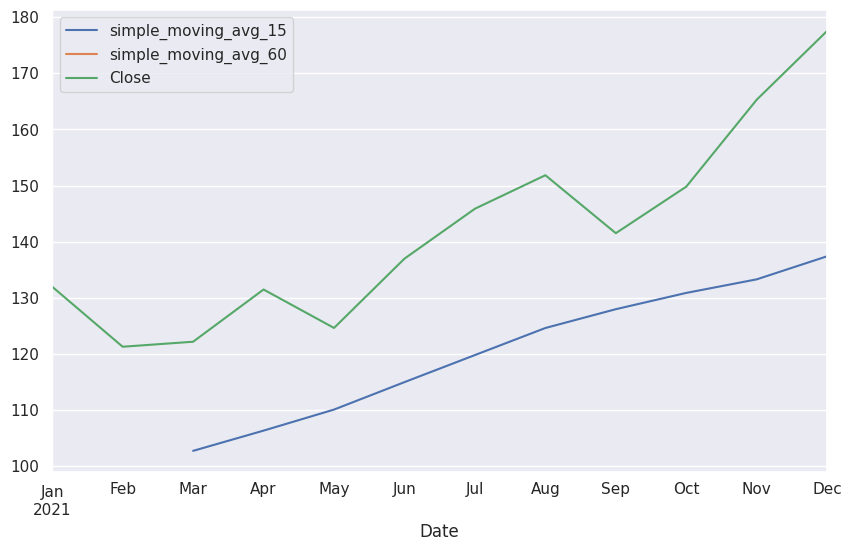

In [15]:
df[["simple_moving_avg_15", "simple_moving_avg_60", "Close"]].loc["2021"].plot(figsize=(10, 6))

In [16]:
del df["simple_moving_avg_3"]
del df["simple_moving_avg_60"]
del df["simple_moving_avg_15"]

In [26]:
df["returns"] = df["Close"].pct_change(1)
df["simple_moving_avg_15"] = df[["returns"]].rolling(15).std().shift(1)
df["simple_moving_avg_60"] = df[["returns"]].rolling(60).std().shift(1)

<Axes: xlabel='Date'>

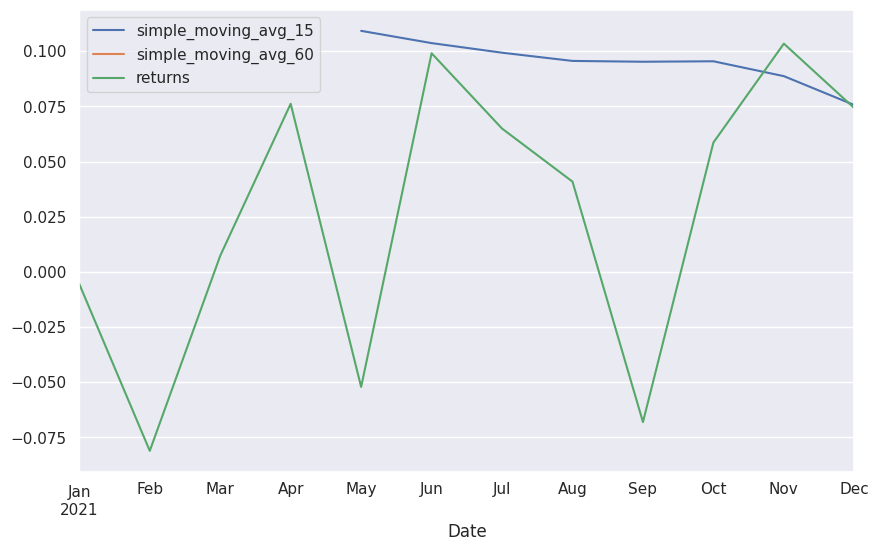

In [27]:
df[["simple_moving_avg_15", "simple_moving_avg_60", "returns"]].loc["2021"].plot(figsize=(10, 6))

## Use Technical Analysis library

In [19]:
%pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=4deed5cbd42e1285611052ab1e36407f512991cff6014fceaa208b2170e3e044
  Stored in directory: /home/alexa/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [22]:
import ta

RSI = ta.add_momentum_ta(df, high="High", low="Low", close="Close", volume="Volume", fillna=False)
RSI

,Open,High,Low,Close,Adj Close,Volume,returns,simple_moving_avg_15,simple_moving_avg_60,momentum_rsi,...,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,74.059998,81.962502,73.187500,77.377502,75.287575,2934370400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,76.074997,81.805000,64.092499,68.339996,66.494156,3019279200,-0.116798,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,70.570000,76.000000,53.152500,63.572498,62.002239,6280072400,-0.069761,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,61.625000,73.632500,59.224998,73.449997,71.635773,3265299200,0.155374,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-01,71.562500,81.059998,71.462502,79.485001,77.521690,2805936000,0.082165,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-01,79.437500,93.095001,79.302498,91.199997,89.188103,3243375600,0.147386,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,91.279999,106.415001,89.144997,106.260002,103.915894,3020283200,0.165132,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,108.199997,131.000000,107.892502,129.039993,126.193336,4070061100,0.214380,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,132.759995,137.979996,103.099998,115.809998,113.459412,3885245100,-0.102526,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df["rsi"] = RSI.momentum_rsi

<Axes: xlabel='Date'>

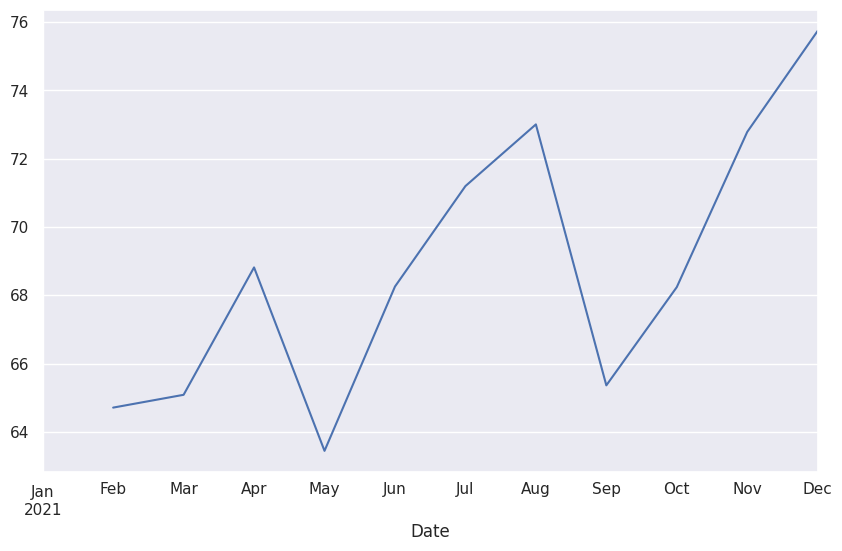

In [25]:
df["rsi"].loc["2021"].plot(figsize=(10, 6))

## Linear Regression for trading

In [40]:
df = yf.download("AAPL")

[*********************100%%**********************]  1 of 1 completed


In [41]:
def feature_engineering(df: pd.DataFrame):

    df["simple_moving_avg_15"] = df[["Close"]].rolling(15).mean().shift(1)
    df["simple_moving_avg_60"] = df[["Close"]].rolling(60).mean().shift(1)

    df["returns"] = df["Close"].pct_change(1)
    df["simple_moving_avg_15"] = df[["returns"]].rolling(15).std().shift(1)
    df["simple_moving_avg_60"] = df[["returns"]].rolling(60).std().shift(1)

    RSI = ta.add_momentum_ta(df, high="High", low="Low", close="Close", volume="Volume", fillna=False)

    df["rsi"] = RSI.momentum_rsi

    df.dropna(inplace=True)

    return df
    

In [42]:
df = feature_engineering(df)

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Close"], axis=1)
y = df[["Close"]]

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [55]:
X_full = pd.concat([X_train, x_test])
prediction = reg.predict(X_full)
df["prediction"] = prediction

<Axes: xlabel='Date'>

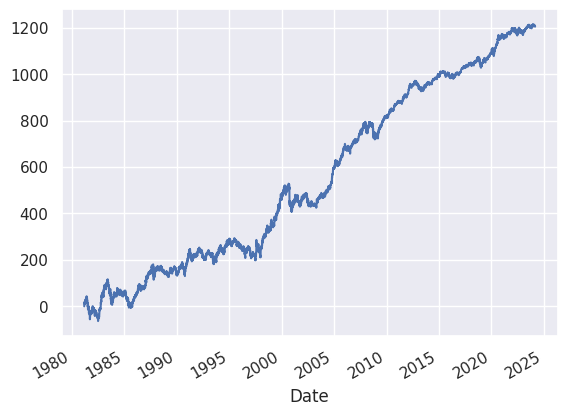

In [56]:
df["position"] = np.sign(df["prediction"])

df["strategy"] = df["returns"] * df["position"].shift(1)

(df["strategy"].cumsum() * 100).plot()

## Vectorized backtesting

In [63]:
df = yf.download("AAPL", start="2020-01-01", end="2023-12-31")
return_series = df["Adj Close"].pct_change(1).dropna()
return_series.name = "return"

mean = np.mean(return_series)
vol = np.std(return_series[return_series < 0])
sortino = mean / vol * np.sqrt(252)

print(f"Sortino {'%.3f' % sortino}")

[*********************100%%**********************]  1 of 1 completed

Sortino 1.268
